In [18]:
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

peliculas = pd.read_csv('RatingsPeliculas.csv')
peliculas.columns = ['Pelicula', 'Genero', 'RatingsCriticos', 'RatingsAudiencia', 'PresupuestoMillones', 'Año']

peliculas.Pelicula = peliculas.Pelicula.astype('category')
peliculas.Genero = peliculas.Genero.astype('category')
peliculas.Año = peliculas.Año.astype('category')
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pelicula             559 non-null    category
 1   Genero               559 non-null    category
 2   RatingsCriticos      559 non-null    int64   
 3   RatingsAudiencia     559 non-null    int64   
 4   PresupuestoMillones  559 non-null    int64   
 5   Año                  559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


---
# Dashboard en Python

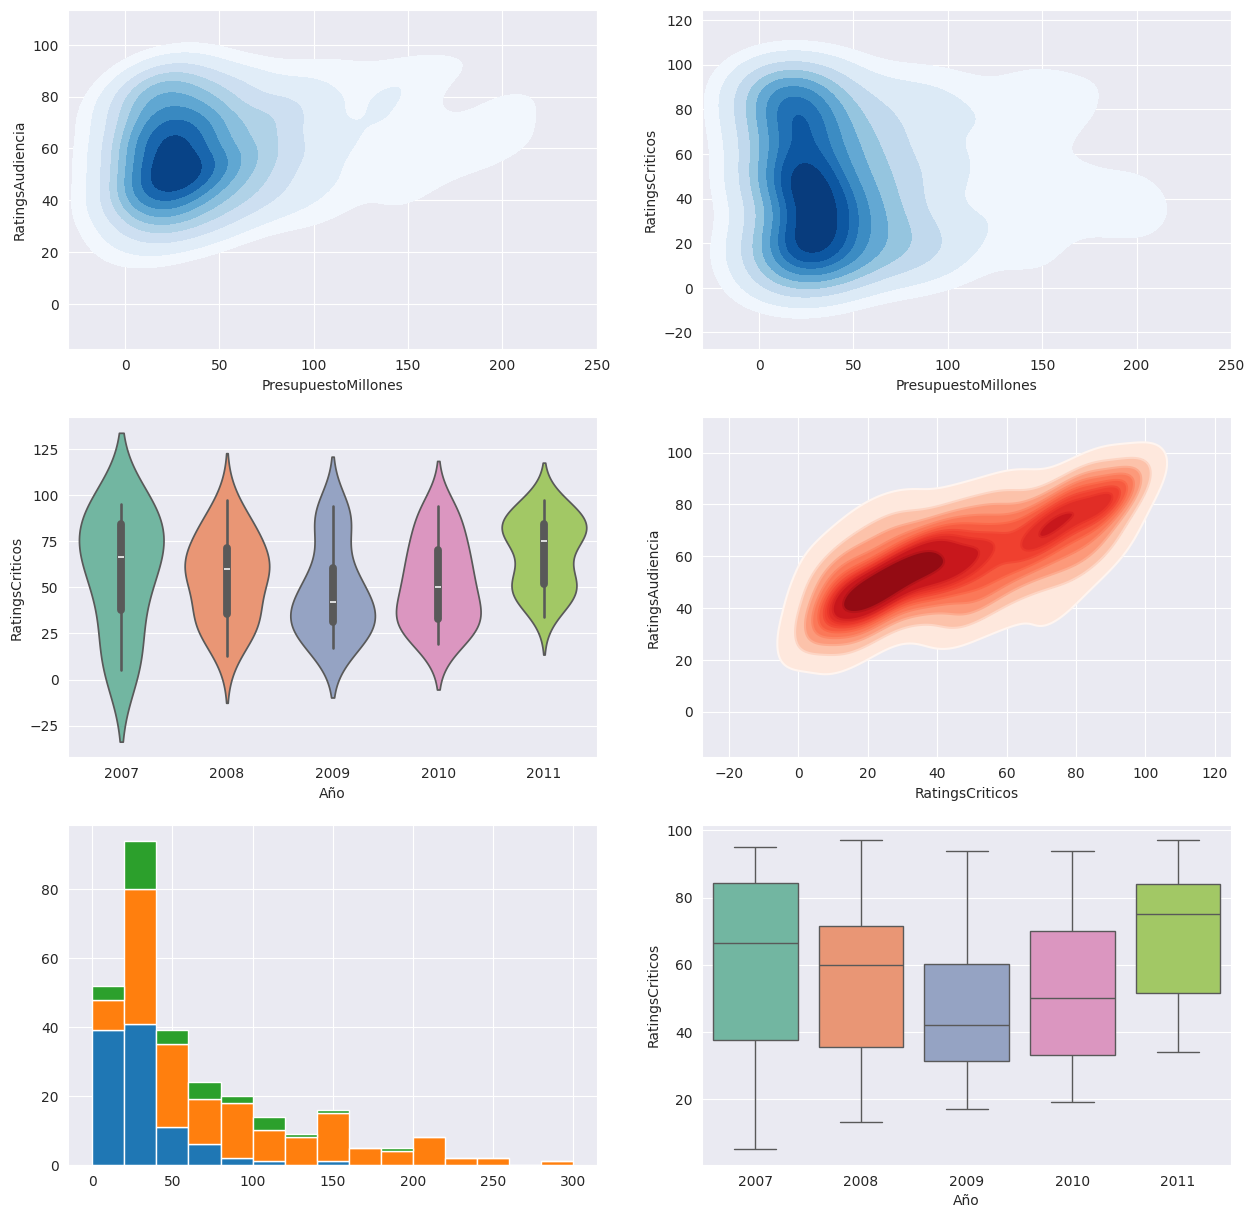

In [19]:
sns.set_style("darkgrid") # Tema oscuro
f, ax = plt.subplots(3,2,figsize=(15, 15))

#Gráfico 1 
k1 = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsAudiencia, data=peliculas,
                 shade=True, shade_lowest=False, cmap="Blues", ax=ax[0,0])

# Gráfico 2
k2 = sns.kdeplot(x=peliculas.PresupuestoMillones, y=peliculas.RatingsCriticos, data=peliculas,
                 shade=True, shade_lowest=False, cmap="Blues", ax=ax[0,1])

# Gráfico 3
w = sns.violinplot(x="Año", y="RatingsCriticos", data=peliculas[peliculas.Genero == 'Drama'], palette="Set2", ax=ax[1,0])

# Gráfico 4
sns.set_style("darkgrid") # Tema oscuro
k3 = sns.kdeplot(x=peliculas.RatingsCriticos, y=peliculas.RatingsAudiencia, 
                 shade=True, shade_lowest=False, cmap="Reds", ax=ax[1,1])
# Tip para que se vea mejor los bordes.
k4 = sns.kdeplot(x=peliculas.RatingsCriticos, y=peliculas.RatingsAudiencia, 
                 cmap="Reds", ax=ax[1,1])


# Gráfico 5 - IMPORTANTE
## Para agregar gráficos que no sean se Seaborn el método es distinto.
ax[2,0].hist([
        peliculas[peliculas.Genero == "Drama"].PresupuestoMillones , 
        peliculas[peliculas.Genero == "Accion"].PresupuestoMillones, 
        peliculas[peliculas.Genero == "Suspenso"].PresupuestoMillones], 
        bins=15, 
        stacked=True)

# Gráfico 6
box = sns.boxplot(x="Año", y="RatingsCriticos", data=peliculas[peliculas.Genero == 'Drama'], palette="Set2", ax=ax[2,1])


k1.set(xlim=(-30,250))
k2.set(xlim=(-30,250))

plt.show()